In [247]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import os
from torch import nn


class MyDataset(Dataset):
    def __init__(self, data_path):
        self.data_path = data_path
        # self.transform = transforms.Compose([
        #     transforms.Resize((32, 32)),
        #     transforms.ToTensor(),
        #     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        # ])

    def __len__(self):
        return len(os.listdir(self.data_path))

    def __getitem__(self, idx):
        img_path = os.path.join(self.data_path, os.listdir(self.data_path)[idx])
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        label = 0  # Replace with your label if available
        return img, label


path='/Algorithm_Trading_01/DATA/Symetric triangle/'

dataset = MyDataset(data_path=path)




# Define your model here
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(12)
        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=5, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(12)
        self.pool = nn.MaxPool2d(2,2)
        self.conv4 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(24)
        self.conv5 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=5, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(24)
        self.fc1 = nn.Linear(24*10*10, 10)


    def forward(self, input):
        output = F.relu(self.bn1(self.conv1(input)))      
        output = F.relu(self.bn2(self.conv2(output)))     
        output = self.pool(output)                        
        output = F.relu(self.bn4(self.conv4(output)))     
        output = F.relu(self.bn5(self.conv5(output)))     
        output = output.view(-1, 24*10*10)
        output = self.fc1(output)
        return output

# Create a DataLoader for your dataset
batch_size = 64
dataset = MyDataset('/path/to/your/data')
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Create an instance of your model
model = MyModel()

# Pass a batch of data through the model
for i, (images, labels) in enumerate(dataloader):
    outputs = model(images)
    # Do something with the outputs

from torch.optim import Adam 
# Define the loss function with Classification Cross-Entropy loss and an optimizer with Adam optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=0.001, weight_decay=0.0001)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/path/to/your/data'

In [3]:
from torch.autograd import Variable

# Function to save the model
def saveModel():
    path = "./myFirstModel.pth"
    torch.save(model.state_dict(), path)

# Function to test the model with the test dataset and print the accuracy for the test images
def testAccuracy():
    
    model.eval()
    accuracy = 0.0
    total = 0.0
    
    with torch.no_grad():
        for data in test_loader:
            images, labels = data
            # run the model on the test set to predict labels
            outputs = model(images)
            # the label with the highest energy will be our prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            accuracy += (predicted == labels).sum().item()
    
    # compute the accuracy over all test images
    accuracy = (100 * accuracy / total)
    return(accuracy)


# Training function. We simply have to loop over our data iterator and feed the inputs to the network and optimize.
def train(num_epochs):
    
    best_accuracy = 0.0

    # Define your execution device
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print("The model will be running on", device, "device")
    # Convert model parameters and buffers to CPU or Cuda
    model.to(device)

    for epoch in range(num_epochs):  # loop over the dataset multiple times
        running_loss = 0.0
        running_acc = 0.0

        for i, (images, labels) in enumerate(train_loader, 0):
            
            # get the inputs
            images = Variable(images.to(device))
            labels = Variable(labels.to(device))

            # zero the parameter gradients
            optimizer.zero_grad()
            # predict classes using images from the training set
            outputs = model(images)
            # compute the loss based on model output and real labels
            loss = loss_fn(outputs, labels)
            # backpropagate the loss
            loss.backward()
            # adjust parameters based on the calculated gradients
            optimizer.step()

            # Let's print statistics for every 1,000 images
            running_loss += loss.item()     # extract the loss value
            if i % 1000 == 999:    
                # print every 1000 (twice per epoch) 
                print('[%d, %5d] loss: %.3f' %
                      (epoch + 1, i + 1, running_loss / 1000))
                # zero the loss
                running_loss = 0.0

        # Compute and print the average accuracy fo this epoch when tested over all 10000 test images
        accuracy = testAccuracy()
        print('For epoch', epoch+1,'the test accuracy over the whole test set is %d %%' % (accuracy))
        
        # we want to save the model if the accuracy is the best
        if accuracy > best_accuracy:
            saveModel()
            best_accuracy = accuracy

Trying ot deal with the My Dataset class:

In [248]:
class MyDataset(Dataset):
    def __init__(self, data_path):
        self.data_path = data_path
        # self.transform = transforms.Compose([
        #     transforms.Resize((32, 32)),
        #     transforms.ToTensor(),
        #     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
        # ])

    def __len__(self):
        return len(os.listdir(self.data_path))

    def __getitem__(self, idx):
        img_path = os.path.join(self.data_path, os.listdir(self.data_path)[idx])
        img = Image.open(img_path).convert('RGB')
        img = self.transform(img)
        label = 0  # Replace with your label if available
        return img, label


path='/Algorithm_Trading_01/DATA/Symetric triangle/'

dataset = MyDataset(data_path=path)


In [1]:
import os
import pandas as pd
from torchvision.io import read_image
import matplotlib.pyplot as plt


# class CustomImageDataset(Dataset):
#     def __init__(self, img_dir, transform=None, target_transform=None):
#         self.img_labels = 1
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform

#     def __len__(self):
#         return len(self.img_labels)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = 1
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label
    
# training_data=CustomImageDataset(img_dir='/Algorithm_Trading_01/DATA/Symetric triangle/',)

# from torch.utils.data import DataLoader


# train_dataloader = DataLoader(training_data, shuffle=True)

# # test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

# train_features, train_labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# img = train_features[0].squeeze()
# label = train_labels[0]
# plt.imshow(img, cmap="gray")
# plt.show()
# print(f"Label: {label}")


a:\python_env1\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


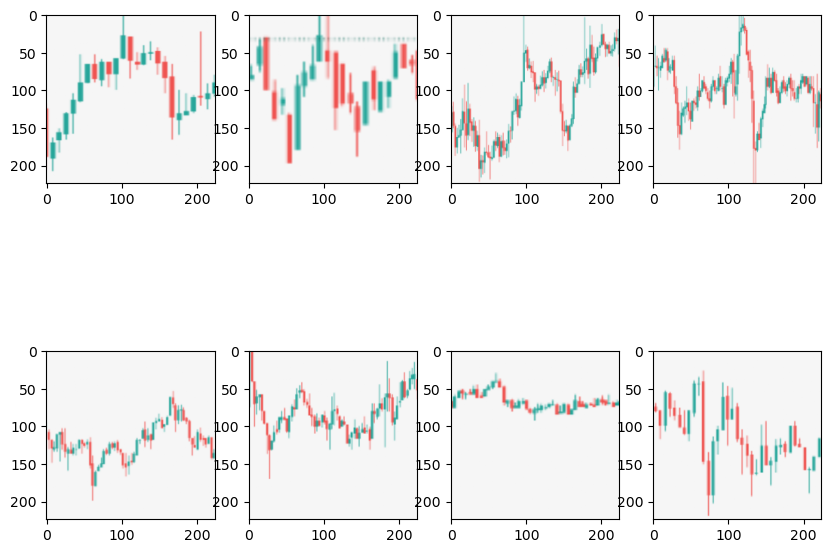

In [8]:


# path_iamge_0="A:/Algorithm_Trading_01/DATA/Train/Rising_Wedge/"

path_iamge_0='A:\Algorithm_Trading_01\DATA\Train'
# img_path = os.path.join(path, os.listdir(path)[5])
from os import walk
import cv2 as cv
from torchvision import datasets, transforms
from PIL import Image
import torch

image_0=os.path.join(path_iamge_0,os.listdir(path_iamge_0)[0])


# img=cv.imread(image_0) # Turn the image path to numpy array format also RGB type
# img_2= Image.open(image_0) # Open the Image for plotting, also can plot with matplotlib -> (imshow method)
# plt.imshow(img_2)
# print(image_0)

# ta=transforms.Compose([transforms.ToTensor()]) # Can turn the image or tensor to Tensor format
transform = transforms.Compose([transforms.Resize(255), transforms.CenterCrop(224),transforms.ToTensor()])

Dataset = datasets.ImageFolder(path_iamge_0, transform=transform) 
dataloader = torch.utils.data.DataLoader(Dataset, shuffle=True)

fig,axes=plt.subplots(figsize=(10,8),ncols=4,nrows=2)
row = 0
col = 0

for index in range(8):
    images, labels = next(iter(dataloader))
    ax = axes[row,col] # row,col
    ax.imshow(images[0].permute(1,2,0))

    col+=1
    if col==4:
        row+=1
        col=0

In [35]:
# import os
# import matplotlib.pyplot as plt
# import cv2 as cv
# import shutil
# from distutils.dir_util import copy_tree

# path='C:\\Users\\Erfan\\Videos\\Movavi Screen Recorder'
# new_path='A:/Algorithm_Trading_01/DATA/Train/Rising_Wedge/'
copy_path='A:/Algorithm_Trading_01/DATA/copy_rising_wedge/'
copy_path2='A:/Algorithm_Trading_01/DATA/copy_Train//copy_rising_wedge/'

# for i in os.listdir(path):
#     shutil.move(os.path.join(path,i),new_path)
# copy_tree(new_path,copy_path)
# shutil.move(copy_path,copy_path2)


'A:/Algorithm_Trading_01/DATA/copy_Train//copy_rising_wedge/'

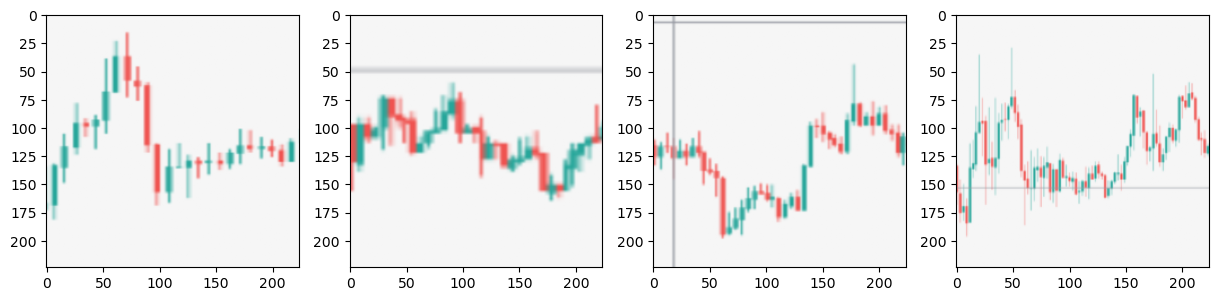

In [213]:
dataloader = torch.utils.data.DataLoader(Dataset, shuffle=True)

# plt.imshow(images[0].permute(1,2,0))
fig, axes = plt.subplots(figsize=(15,5), ncols=4)
for ii in range(4):
    images, labels = next(iter(dataloader))
    ax = axes[ii] # Define the every axis
    ax.imshow(images[0].permute(1,2,0)) # plot every chart in 4 axis. 